## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv('Fraud(1).csv', sep=',')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Exploring the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.shape

(6362620, 11)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Data Cleaning

1. Searching and Counting the number of missing values

In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

 2. Searching and Counting the number of duplicate values

In [8]:
df.duplicated().sum()

0

3. Evaluating Multicollinearity

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['step', 'amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature         VIF
0            step    1.188495
1          amount    4.011315
2   oldbalanceOrg  465.122355
3  newbalanceOrig  466.903890
4  oldbalanceDest   71.765327
5  newbalanceDest   83.231611


VIF starts at 1 and has no upper limit
VIF = 1, no correlation between the independent variable and the other variables
VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

Clearly, four columns i.e., oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest have very high values of VIF because 
new balance would be dependent on the old balance. So it would be better to drop one of (oldbalanceOrg & newbalanceOrig) and
(oldbalanceDest & newbalanceDest). 
So I am dropping newbalanceOrig and newbalanceDest.

In [10]:
df = df.drop(['newbalanceOrig','newbalanceDest'], axis = 1)

In [11]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,0,0


3. Checking and Removing Outliers

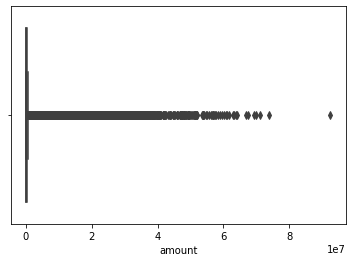

In [12]:
#sns.boxplot(data=df, x='amount')
ax = sns.boxplot(x=df["amount"])
#sns.boxplot(df['amount'])

In [13]:
Q1 = np.percentile(df['amount'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['amount'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

195331.935


In [14]:
print("Old Shape: ", df.shape)
# Upper bound
upper = np.where(df['amount'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['amount'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (6362620, 9)
New Shape:  (6024543, 9)


## Exploratory Data Analysis

The provided data has the financial transaction data as well as the target variable isFraud, which is the actual fraud status of the transaction and isFlaggedFraud is the indicator which the simulation is used to flag the transaction using some threshold. 
From the hypothesis, isFraud is the indicator which indicates the actual fraud transactions whereas isFlaggedFraud is what the system prevents the transaction due to some thresholds being triggered.


In [16]:
class_data = df["isFraud"].value_counts()
print(class_data)
print('No Frauds', round(df['isFraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['isFraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

0    6020184
1       4359
Name: isFraud, dtype: int64
No Frauds 99.93 % of the dataset
Frauds 0.07 % of the dataset


Since there is hige difference in the number of observations in Non Fraud and Fraud observations, this is an 
'Imbalanced Dataset'. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

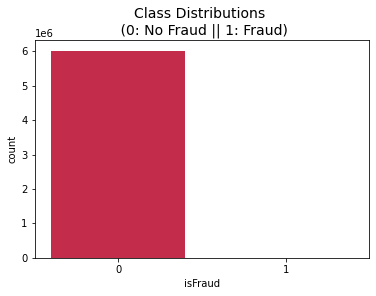

In [17]:
colors = ["crimson", "pink"]

sns.countplot('isFraud', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(1.0, 743.0)

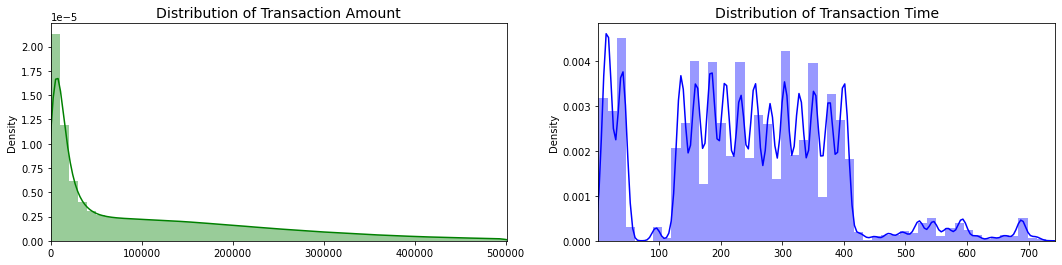

In [18]:
fig, ax =  plt.subplots(1, 2, figsize=(18,4))

amount_val = df['amount'].values
time_val = df['step'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

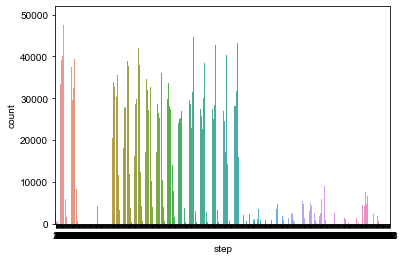

In [21]:
ax = sns.countplot(x="step", data=df)
sns.set(rc={'figure.figsize':(7,7)})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 501719.38)

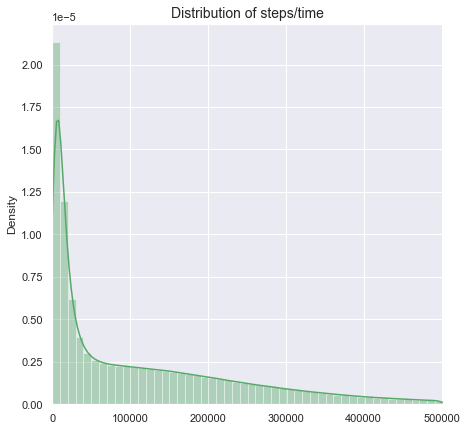

In [22]:
step_val = df['amount'].values
ax = sns.distplot(step_val, color='g')
ax.set_title('Distribution of steps/time', fontsize=14)
ax.set_xlim([min(step_val), max(step_val)])


In [19]:
df.corr()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.010500,-0.010798,0.022818,0.022884,0.001509
amount,-0.010500,1.000000,0.091411,0.184747,0.014009,0.001268
oldbalanceOrg,-0.010798,0.091411,1.000000,0.084911,-0.006296,0.000887
oldbalanceDest,0.022818,0.184747,0.084911,1.000000,-0.004087,-0.000188
isFraud,0.022884,0.014009,-0.006296,-0.004087,1.000000,0.021412
isFlaggedFraud,0.001509,0.001268,0.000887,-0.000188,0.021412,1.000000


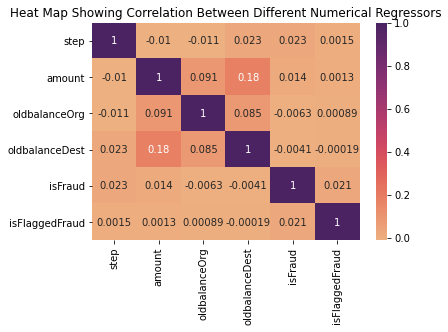

In [20]:
sns.heatmap(df.corr(),annot=True, cmap='flare')
plt.title('Heat Map Showing Correlation Between Different Numerical Regressors')
plt.show()

## Feature Engineering

1. Droping Name Columns

In [23]:
df = df.drop(['nameOrig','nameDest'], axis = 1)

In [24]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,21182.0,1,0
4,1,PAYMENT,11668.14,41554.0,0.0,0,0


## Data Visualization

CASH_OUT    2185250
PAYMENT     2151495
CASH_IN     1373826
TRANSFER     272542
DEBIT         41430
Name: type, dtype: int64


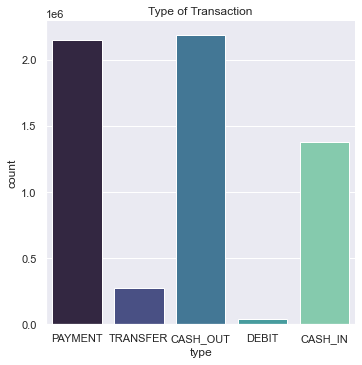

In [25]:
print(df.type.value_counts())
ax = sns.catplot(x='type',data=df, kind='count',palette='mako')
plt.title('Type of Transaction')
plt.show()

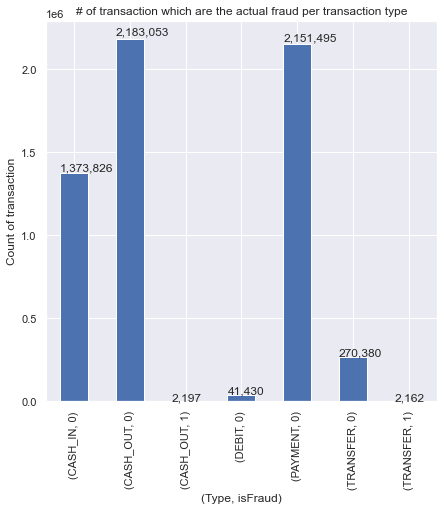

In [26]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))   

of the five types of transactions, fraud occurs only in two of them i.e., in 'TRANSFER' where money is sent to a customer / fraudster and in 'CASH_OUT' where money is sent to a merchant who pays the customer / fraudster in cash. Remarkably, the number of fraudulent TRANSFERs almost equals the number of fraudulent CASH_OUTs.

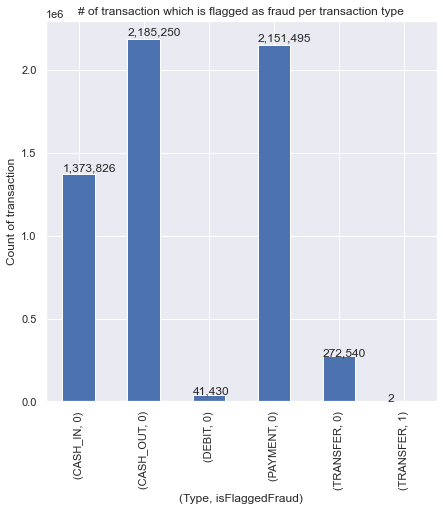

In [27]:
ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

So it looks the simulation can flag only 16 transfer transactions as fraud.

## Dealing with imblanced dataset through Random Undersampling

In [27]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,21182.0,1,0
4,1,PAYMENT,11668.14,41554.0,0.0,0,0


In [28]:
from imblearn.under_sampling import RandomUnderSampler
X = df.drop(['isFraud', 'type', 'isFlaggedFraud'], axis = 1)
y = df.isFraud
rus = RandomUnderSampler(sampling_strategy= 0.8)
X_res, y_res = rus.fit_resample(X, y)
print(X_res.shape, y_res.shape)
print(pd.value_counts(y_res))

(9807, 4) (9807,)
0    5448
1    4359
Name: isFraud, dtype: int64


In [29]:
print(X_res)
print(y_res)

      step     amount  oldbalanceOrg  oldbalanceDest
0      325  458623.49           0.00     10669685.17
1      401  240067.27       96700.00            0.00
2      381  131282.61           0.00      1546576.94
3      284   17662.61           0.00            0.00
4      396   31839.49         528.00            0.00
...    ...        ...            ...             ...
9802   742  258355.42      258355.42        25176.67
9803   742   63416.99       63416.99            0.00
9804   742   63416.99       63416.99       276433.18
9805   743  339682.13      339682.13            0.00
9806   743  339682.13      339682.13            0.00

[9807 rows x 4 columns]
0       0
1       0
2       0
3       0
4       0
       ..
9802    1
9803    1
9804    1
9805    1
9806    1
Name: isFraud, Length: 9807, dtype: int64


In [30]:
train_data = pd.concat((X_res,y_res), axis = 1)
train_data.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,325,458623.49,0.0,10669685.17,0
1,401,240067.27,96700.0,0.00,0
2,381,131282.61,0.0,1546576.94,0
3,284,17662.61,0.0,0.00,0
4,396,31839.49,528.0,0.00,0


0    5448
1    4359
Name: isFraud, dtype: int64
Target Variables


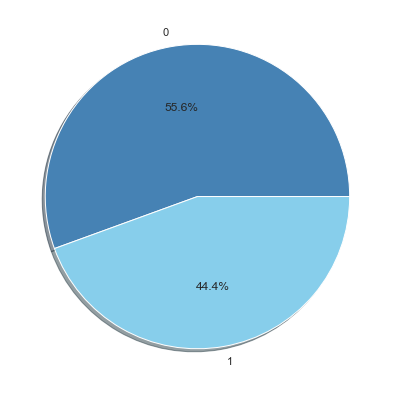

In [31]:
class_data= pd.value_counts(y_res)
print(class_data)

print('Target Variables')
#Visualization
plt.pie(class_data,labels=['0','1'],colors=['steelblue','skyblue'],shadow=True,autopct="%1.1f%%",radius=1)
plt.show()

## Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split
X = train_data.drop(['isFraud'],axis=1)
y = train_data['isFraud']
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2 , random_state = 0)

## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
X_train

array([[ 1.18737732,  2.6967758 , -0.03619862, -0.2126198 ],
       [-1.41946936,  1.18165954, -0.125648  ,  0.72154005],
       [-1.36188841, -0.80586459, -0.25340062, -0.2126198 ],
       ...,
       [ 0.39694791, -0.99310557, -0.2490752 , -0.2126198 ],
       [-0.0636997 , -0.68350461, -0.20978092, -0.2126198 ],
       [-1.37235767, -1.0376147 , -0.25713337, -0.2126198 ]])

## Training on Various Machine Learning Models

## 1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
print(classification_report(y_test, y_pred))
print('accuracy', accuracy_score(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.68      0.79      0.73      1048
           1       0.71      0.58      0.64       914

    accuracy                           0.69      1962
   macro avg       0.70      0.69      0.69      1962
weighted avg       0.70      0.69      0.69      1962

accuracy 0.6936799184505607


0.6864737668498505

## 2. Support Vector Machine

In [38]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
print(classification_report(y_test, y_pred))
print('accuracy', accuracy_score(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1048
           1       0.81      0.69      0.74       914

    accuracy                           0.78      1962
   macro avg       0.79      0.77      0.78      1962
weighted avg       0.78      0.78      0.78      1962

accuracy 0.7803261977573904


0.7744354151702941

## 3. Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)

In [45]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.54 %
Standard Deviation: 0.65 %


In [42]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
print(classification_report(y_test, y_pred))
print('accuracy', accuracy_score(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1048
           1       0.94      0.97      0.96       914

    accuracy                           0.96      1962
   macro avg       0.96      0.96      0.96      1962
weighted avg       0.96      0.96      0.96      1962

accuracy 0.9597349643221202


0.9604905457096564

In [46]:
from sklearn.model_selection import GridSearchCV

parameters = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
grid_search = GridSearchCV(estimator = classifier1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)    # decision tree model

Best Accuracy: 94.90 %
Best Parameters: {'criterion': 'gini', 'max_depth': 13}


## 4. Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)

In [47]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.33 %
Standard Deviation: 0.72 %


In [48]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
print(classification_report(y_test, y_pred))
print('accuracy', accuracy_score(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1048
           1       0.95      0.97      0.96       914

    accuracy                           0.96      1962
   macro avg       0.96      0.96      0.96      1962
weighted avg       0.96      0.96      0.96      1962

accuracy 0.9617737003058104


0.9623289959410025

In [49]:
from sklearn.model_selection import GridSearchCV

parameters = { "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],}
grid_search = GridSearchCV(estimator = classifier2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)    # decision tree model

Best Accuracy: 95.84 %
Best Parameters: {'max_depth': 13, 'n_estimators': 20}


Hence the final Accuracy is ~ 95%